In [1]:
import lsdb
import pandas as pd
from hats import HealpixPixel
from lsdb.dask.map_partitions import map_partitions

In [2]:
cat = lsdb.open_catalog("../../../../lsdb/tests/data/small_sky_order1_source_collection")

In [3]:
cat

,source_id,source_ra,source_dec,mjd,mag,band,object_id,object_ra,object_dec
npartitions=5,,,,,,,,,
"Order: 1, Pixel: 16",int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow]
"Order: 1, Pixel: 44",...,...,...,...,...,...,...,...,...
"Order: 1, Pixel: 45",...,...,...,...,...,...,...,...,...
"Order: 1, Pixel: 46",...,...,...,...,...,...,...,...,...
"Order: 1, Pixel: 47",...,...,...,...,...,...,...,...,...


In [9]:
cat.map_partitions(lambda df: pd.DataFrame({'avg_mag': [df["mag"].mean()]}), run_single_partition=True)

,avg_mag
0,18.003702


In [11]:
def map_parts_wrong_func(df):
    a = 0
    return pd.DataFrame({'avg_mag': [df["mag"].mean() / a]}) # oh no!

In [15]:
cat.map_partitions(map_parts_wrong_func, run_single_partition=True)

ZeroDivisionError: float division by zero

In [16]:
%debug

> /var/folders/9j/x366vw_x0mgdgzr1wgfchpr80000gn/T/ipykernel_83367/1115318869.py(3)map_parts_wrong_func()
      1 def map_parts_wrong_func(df):
      2     a = 0
----> 3     return pd.DataFrame({'avg_mag': [df["mag"].mean() / a]}) # oh no!

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


In [14]:
cat.cone_search(348, -29, 1000).map_partitions(lambda df: pd.DataFrame({'avg_mag': [df["mag"].mean()]}), run_single_partition=True)

,avg_mag
0,18.011631


In [15]:
cat.map_partitions(lambda df: pd.DataFrame({'avg_mag': [df["mag"].mean()]}), run_single_partition=True, partition_index=1)

,avg_mag
0,17.97938


In [17]:
cat.map_partitions(lambda df: pd.DataFrame({'avg_mag': [df["mag"].mean()]}), run_single_partition=True, partition_index=HealpixPixel(1, 45))

,avg_mag
0,17.992846


In [4]:
test_cat = map_partitions(cat, lambda df: pd.DataFrame({'avg_mag': [df["mag"].mean()]}), run_single_partition=True)
test_cat

,avg_mag
npartitions=1,
"Order: 1, Pixel: 16",float64


In [5]:
test_cat.compute()

,avg_mag
0,18.003702


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - small_sky_order1_source'}>)

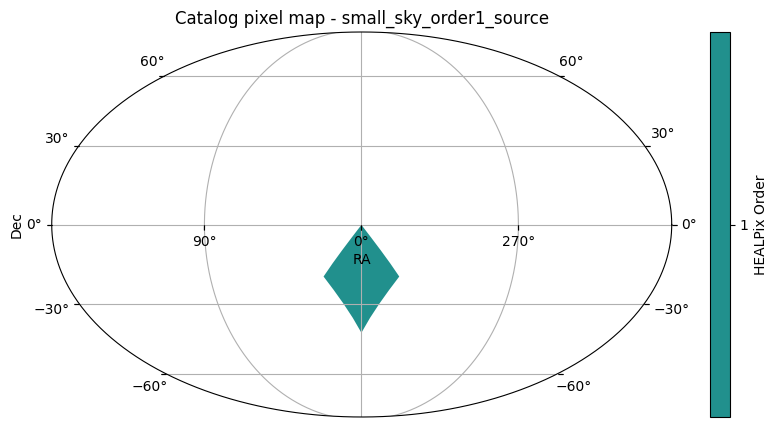

In [6]:
test_cat.plot_pixels()